# Session #2 Homework - Carlotta Hicks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preparation

In [5]:
airbnb = pd.read_csv('data.csv', encoding = "utf-8")

In [6]:
airbnb

id                                              name   host_id  \
0          2539                Clean & quiet apt home by the park      2787   
1          2595                             Skylit Midtown Castle      2845   
2          3647               THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                   Cozy Entire Floor of Brownstone      4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                               ...       ...   
18057  14139651          Centrally Located Private Midtown Studio  19134246   
18058  14140552     Awesome 2bdr in the heart of the East Village   2928701   
18059  14140905                Beautiful Bushwick loft for August   8133558   
18060  14141050       Two bedrooms available in a cozy apartment.   1715674   
18061  14141215                               private room in LES  85368273   

         host_name neighbourhood_group    neighbourhood  latitude  longitude  \
0             John            Brooklyn       Kensington  40.64749  -73.97237   
1         Jennifer           Manhattan          Midtown  40.75362  -73.98377   
2        Elisabeth           Manhattan           Harlem  40.80902  -73.94190   
3      LisaRoxanne            Brooklyn     Clinton Hill  40.68514  -73.95976   
4            Laura           Manhattan      East Harlem  40.79851  -73.94399   
...            ...                 ...              ...       ...        ...   
18057      Brendan           Manhattan         Kips Bay  40.74506  -73.97934   
18058     Catalina           Manhattan     East Village  40.72872  -73.98267   
18059      Gryphon            Brooklyn         Bushwick  40.69493  -73.92940   
18060       Shriya            Brooklyn  Windsor Terrace  40.65544  -73.97491   
18061          Nir           Manhattan  Lower East Side  40.71795  -73.98553   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room  149.0             1.0                9.0  2018-10-19   
1      Entire home/apt  225.0             1.0               45.0  2019-05-21   
2         Private room  150.0             3.0                0.0         NaN   
3      Entire home/apt   89.0             1.0              270.0  2019-07-05   
4      Entire home/apt   80.0            10.0                9.0  2018-11-19   
...                ...    ...             ...                ...         ...   
18057  Entire home/apt  150.0             3.0               10.0  2019-06-15   
18058  Entire home/apt  295.0             7.0               12.0  2019-05-25   
18059     Private room   38.0            15.0                0.0         NaN   
18060     Private room  130.0             2.0                4.0  2018-01-01   
18061     Private room    NaN             NaN                NaN         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                             6.0             365.0  
1                   0.38                             2.0             355.0  
2                    NaN                             1.0             365.0  
3                   4.64                             1.0             194.0  
4                   0.10                             1.0               0.0  
...                  ...                             ...               ...  
18057               0.37                             1.0               8.0  
18058               0.78                             2.0             128.0  
18059                NaN                             1.0               0.0  
18060               0.11                             1.0               0.0  
18061                NaN                             NaN               NaN  

[18062 rows x 16 columns]

## Exploratory data analysis

In [8]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

In [10]:
for col in airbnb.columns:
    print(col)
    print(airbnb[col].unique()[:5])
    print(airbnb[col].nunique())
    print()

id
[2539 2595 3647 3831 5022]
18062

name
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park']
17843

host_id
[2787 2845 4632 4869 7192]
15308

host_name
['John' 'Jennifer' 'Elisabeth' 'LisaRoxanne' 'Laura']
5613

neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
5

neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem']
195

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
11464

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
8780

room_type
['Private room' 'Entire home/apt' 'Shared room']
3

price
[149. 225. 150.  89.  80.]
452

minimum_nights
[ 1.  3. 10. 45.  2.]
84

number_of_reviews
[  9.  45.   0. 270.  74.]
385

last_review
['2018-10-19' '2019-05-21' nan '2019-07-05' '2018-11-19']
1701

reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
617

calculated_host_listings_count
[6. 2. 1.

In [12]:
from pandas_profiling import ProfileReport

In [13]:
prof = ProfileReport(airbnb)

In [14]:
prof

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Features

In [35]:
# Create a data frame using the numeric columns (minus the id columns) from the Airbnb data

ny_bnb = airbnb.select_dtypes(exclude = ['object'])
ny_bnb = ny_bnb.drop(columns=['id', 'host_id'], axis=1)

In [36]:
ny_bnb

latitude  longitude  price  minimum_nights  number_of_reviews  \
0      40.64749  -73.97237  149.0             1.0                9.0   
1      40.75362  -73.98377  225.0             1.0               45.0   
2      40.80902  -73.94190  150.0             3.0                0.0   
3      40.68514  -73.95976   89.0             1.0              270.0   
4      40.79851  -73.94399   80.0            10.0                9.0   
...         ...        ...    ...             ...                ...   
18057  40.74506  -73.97934  150.0             3.0               10.0   
18058  40.72872  -73.98267  295.0             7.0               12.0   
18059  40.69493  -73.92940   38.0            15.0                0.0   
18060  40.65544  -73.97491  130.0             2.0                4.0   
18061  40.71795  -73.98553    NaN             NaN                NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                             6.0             365.0  
1                   0.38                             2.0             355.0  
2                    NaN                             1.0             365.0  
3                   4.64                             1.0             194.0  
4                   0.10                             1.0               0.0  
...                  ...                             ...               ...  
18057               0.37                             1.0               8.0  
18058               0.78                             2.0             128.0  
18059                NaN                             1.0               0.0  
18060               0.11                             1.0               0.0  
18061                NaN                             NaN               NaN  

[18062 rows x 8 columns]

## Question 1

Find a feature with missing values. How many missing values does it have?

In [41]:
ny_bnb.isna().sum()

latitude                             0
longitude                            0
price                                1
minimum_nights                       1
number_of_reviews                    1
reviews_per_month                 3125
calculated_host_listings_count       1
availability_365                     1
dtype: int64

## Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

In [42]:
ny_bnb['minimum_nights'].median()

3.0

## Split the Data

In [45]:
# Shuffle the initial dataset, use seed 42.
n = len(ny_bnb)
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

bnb_shuffled = ny_bnb.iloc[idx]

In [46]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

df_train = bnb_shuffled.iloc[:n_train].copy()
df_val = bnb_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = bnb_shuffled.iloc[n_train+n_val:].copy()

In [48]:
n, n_val, n_test, n_train

(18062, 3612, 3612, 10838)

In [49]:
df_train

latitude  longitude  price  minimum_nights  number_of_reviews  \
2848   40.70188  -73.92275   48.0             7.0               61.0   
17729  40.70170  -73.93716   55.0             1.0               88.0   
15853  40.75550  -73.82712   30.0             4.0               54.0   
5921   40.74751  -74.00086  110.0             6.0               20.0   
11102  40.72917  -73.98517  180.0             1.0               27.0   
...         ...        ...    ...             ...                ...   
12196  40.74404  -73.97564   70.0             3.0                0.0   
18046  40.69394  -73.97115   39.0             1.0               12.0   
12799  40.67042  -73.95072   98.0             1.0                5.0   
5253   40.71231  -73.95313  105.0             1.0              372.0   
16231  40.72153  -73.99493  126.0             2.0               11.0   

       reviews_per_month  calculated_host_listings_count  availability_365  
2848                0.87                             1.0               0.0  
17729               2.43                             2.0             102.0  
15853               1.39                             1.0              64.0  
5921                0.36                             2.0               0.0  
11102               0.59                             2.0               0.0  
...                  ...                             ...               ...  
12196                NaN                             1.0               0.0  
18046               0.34                             1.0               0.0  
12799               0.12                             1.0               0.0  
5253                6.23                             2.0              59.0  
16231               0.29                             1.0               0.0  

[10838 rows x 8 columns]

In [50]:
# Apply the log transformation to the price variable using the np.log1p() function.

y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [51]:
# Drop the target value ('price')

del df_train['price']
del df_val['price']
del df_test['price']

## Question 3

In [58]:
# Deal with missing values

base = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']

In [59]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [61]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [62]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [63]:
y_pred = w_0 + X_train.dot(w)

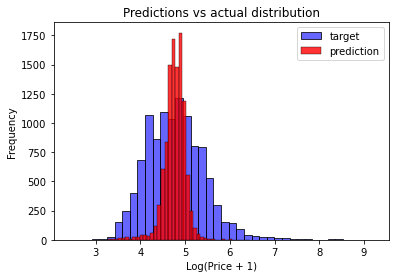

In [65]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [67]:
def prepare_XM(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [73]:
# Train using the mean value for missing values

XM_train = prepare_XM(df_train)
wm_0, wm = train_linear_regression(XM_train, y_train)

In [74]:
ym_pred = wm_0 + XM_train.dot(wm)

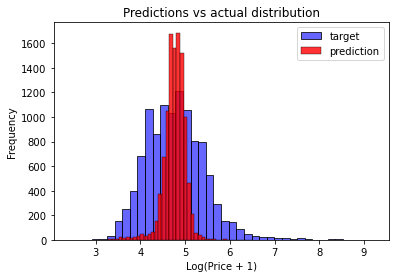

In [75]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(ym_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [71]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [83]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Evaluate the model (missing populated with 0) using validation dataset
X_val = prepare_X(df_val)
yval_pred = w0 + X_val.dot(w)

rmse_zero = rmse(y_val, yval_pred)
print(round(rmse_zero, 2))

# Evaluate the model (missing populated with mean) using validation dataset
XM_val = prepare_XM(df_val)
ymval_pred = w0 + XM_val.dot(w)

rmse_mean = rmse(y_val, ymval_pred)
print(round(rmse_mean, 2))

0.6
0.6
